<a href="https://colab.research.google.com/github/hughjafro/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module1-OLS-regression/CTolbert_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [0]:
# All of the possible import that we will be needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

In [5]:
# Bring in dataset
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

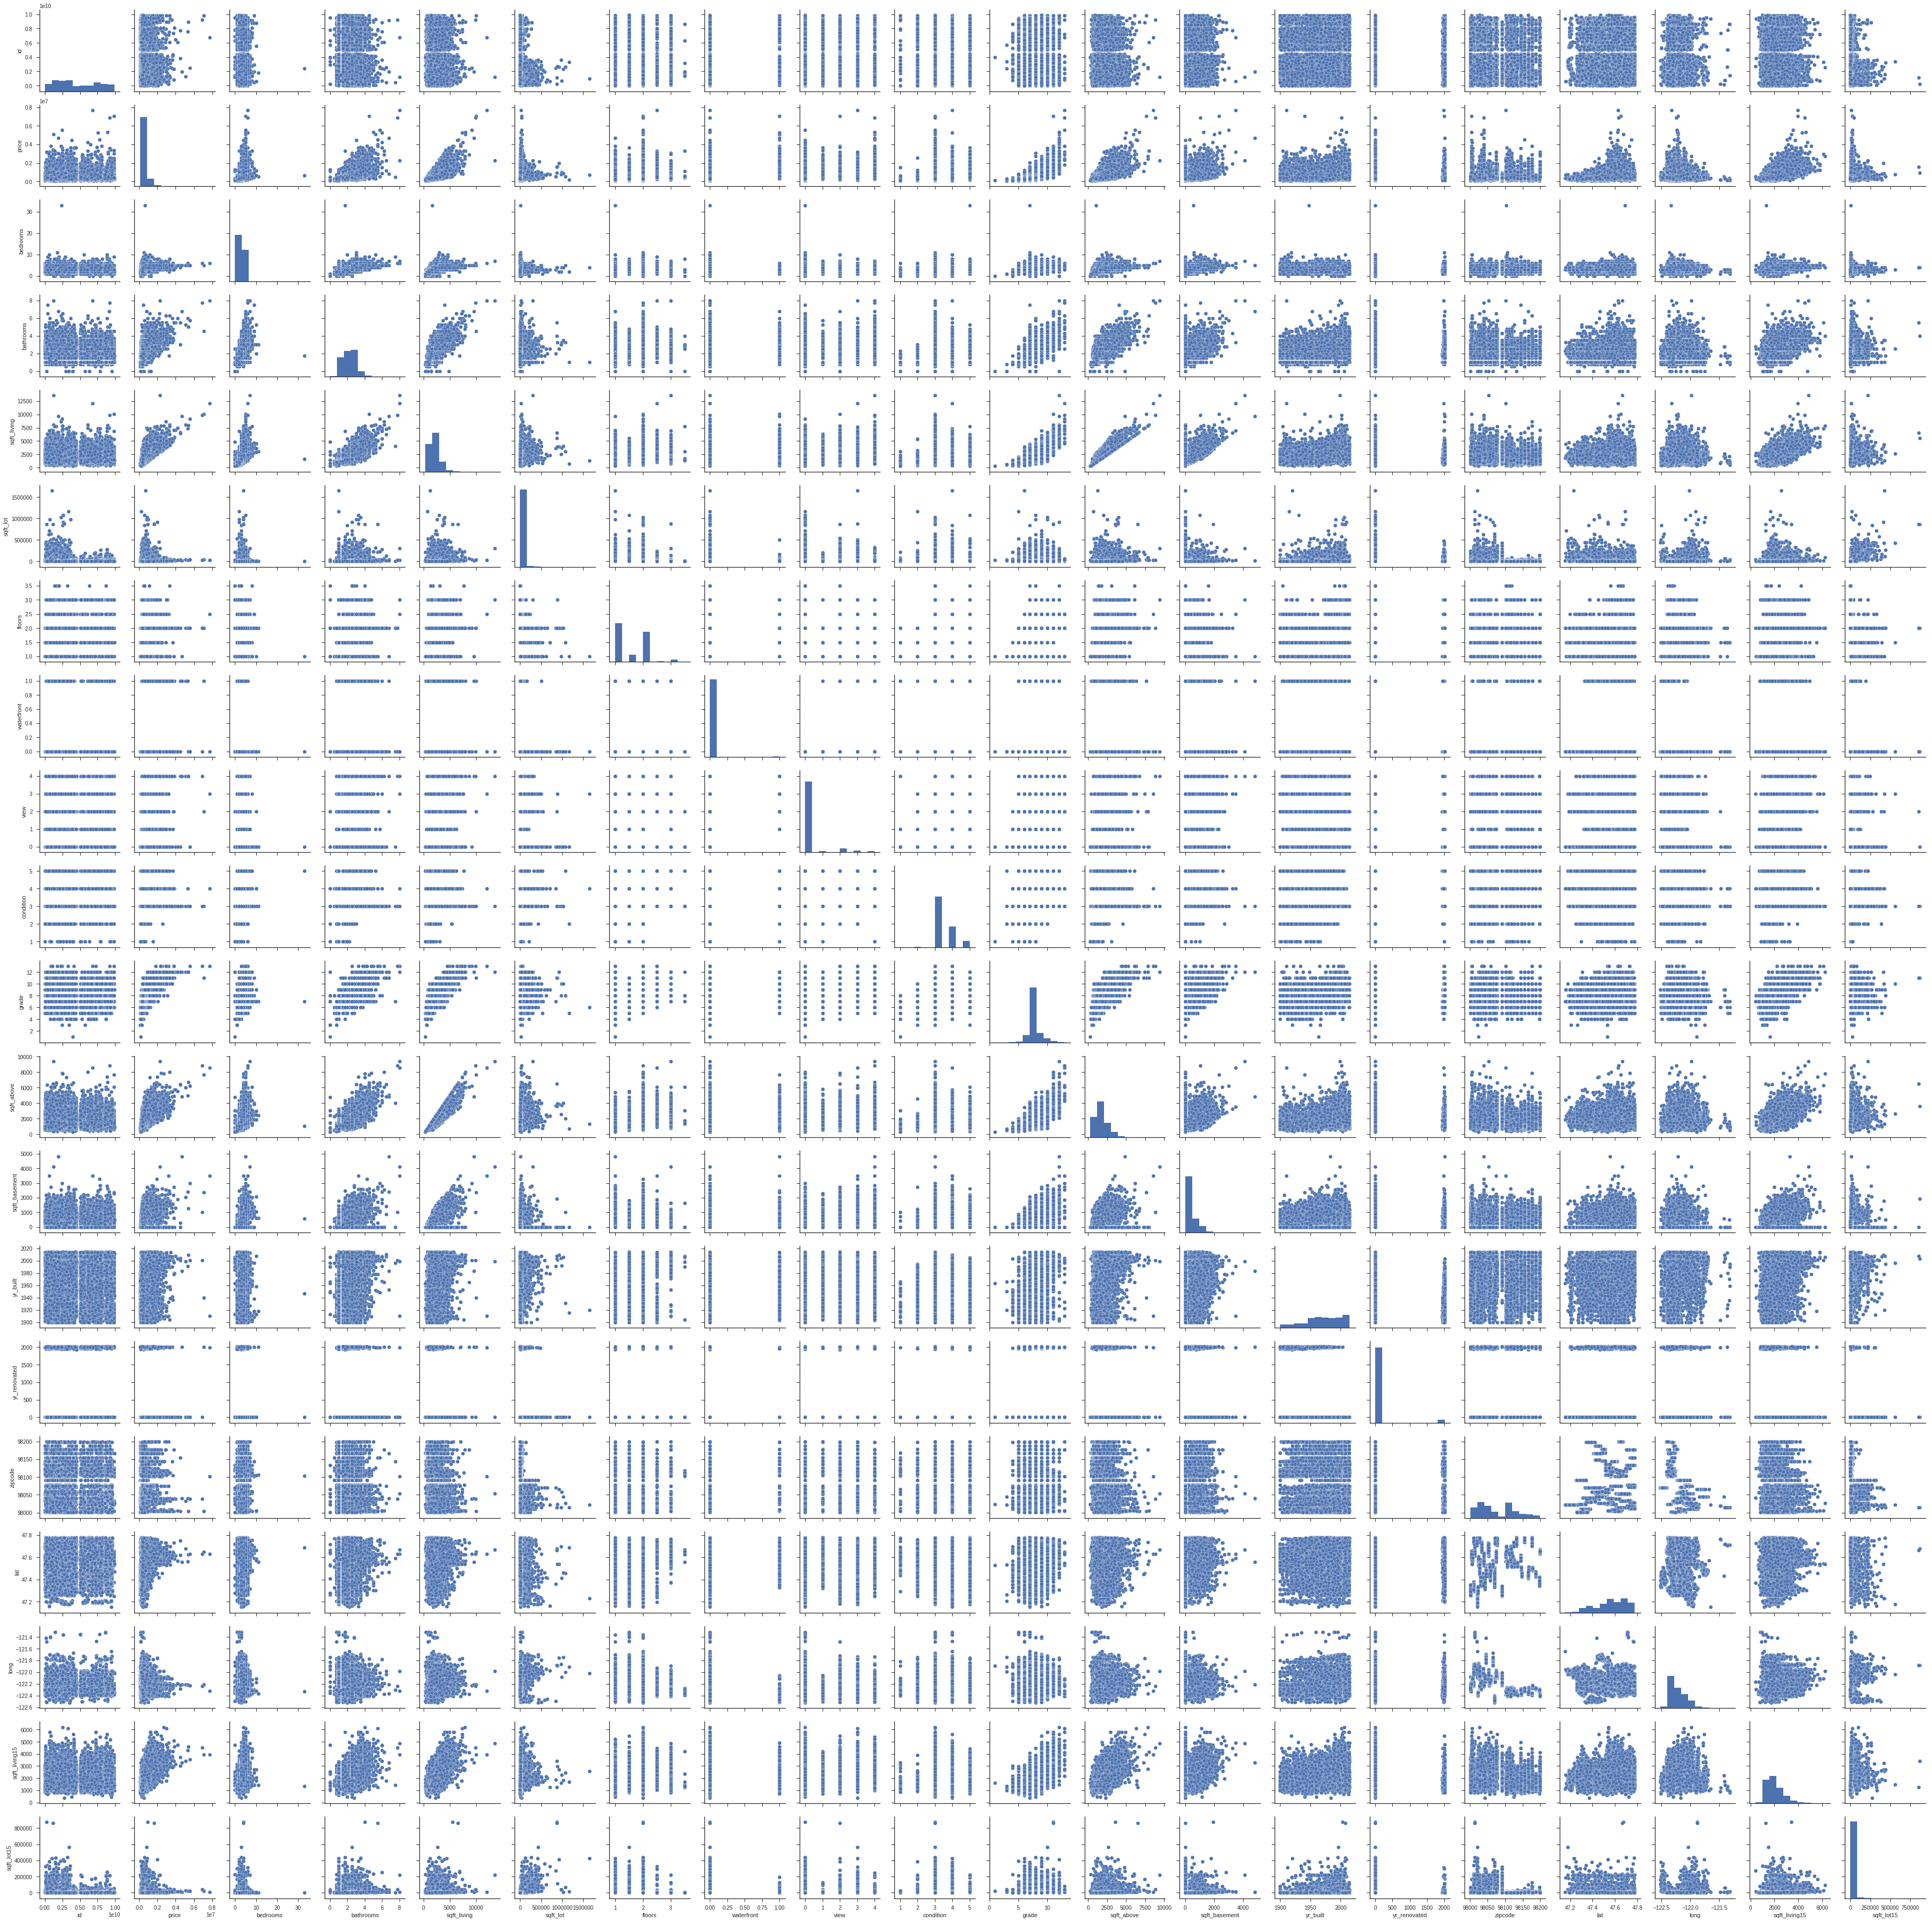

In [0]:
sns.set(style='ticks', color_codes=True)
graph = sns.pairplot(df)

In [0]:
# Define X, y independent and dependent variables
# Choose Square feet living vs price.
X = df[['sqft_living']]
y = df['price']

# Test train split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=12)


In [0]:
print(X.shape)
print(y.shape)

(21613, 1)
(21613,)


In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10806, 1)
(10807, 1)
(10806,)
(10807,)


In [16]:
# Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# beta_0 = model.intercept_
# beta_i = model.coef_

# print("Regression Coefficients: ", beta_i)
# print("\nRegression Intercept Value: ", beta_0)
# print('\ny =', beta_i,'X', ' + ', beta_0)

print("Coefficient: ", model.coef_)
print("\nIntercept: ", model.intercept_)
print('\nR^2: ', model.score(X_train,y_train))


Coefficient:  [267.70079982]

Intercept:  -20348.84191984532

R^2:  0.4861368416576023


In [0]:
# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(df['sqft_living'], df['price'], df['sqft_lot'],c='red')

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz,alpha=0.5)
plt.title("Regression Plane")

plt.show()

In [0]:
# fig, ax = plt.subplots()

# X_plot = np.arange(X_train.min(), X_train.max(), 1)

In [19]:
y_test_predict = model.predict(X_test)

# we want to compute the root mean squared error of actual (Y_test) vs predicted (y_test_predict) 

MSE = mean_squared_error(y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print('MSE is {}:'.format(MSE))

print('RMSE is {}:'.format(RMSE))

R2 = r2_score(y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 75868729535.81482:
RMSE is 275442.78813542175:
R^2 is 0.49581650497627694


In [0]:
# Calculate R^2 and Root mean squared error
print('R-squared: ', model.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

R-squared:  0.49581650497627694
RMSE:  275442.78813542175


# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [32]:
# Two-variable multiple regression
# Choose Square feet living vs price.
X2 = df[['sqft_living', 'grade']]
y2 = df['price']

# Test train split data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.5, random_state=42)

# See shape
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)



(10806, 2)
(10807, 2)
(10806,)
(10807,)


In [45]:
# Set and fit the model

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

# Calculate our betas
beta_0 = model2.intercept_
beta_i = model2.coef_
#beta_i2 = model2.coef_[1]

print('Coefficients: \n', beta_i)
#print('Coefficients-2: \n', beta_i2)
print('\nIntercept: ', beta_0)

Coefficients: 
 [   167.10832275 103065.16259903]

Intercept:  -599835.6618581187


###RMSE and R-Squared

In [48]:
y2_test_predict = model2.predict(X2_test)

# Compute the root mean squared error of actual (Y2_test) vs predicted (y2_test_predict) 

MSE = mean_squared_error(y2_test, y2_test_predict)

RMSE = (np.sqrt(mean_squared_error(y2_test, y2_test_predict)))

print('MSE is {}'.format(MSE))

print('RMSE is {}'.format(RMSE))

R2 = r2_score(y2_test, y2_test_predict)

print('R^2 is {}'.format(R2))

MSE is 70544952427.10252
RMSE is 265602.9977750675
R^2 is 0.5263921128006677


In [0]:
# MSE is 75615202016.2856:
# RMSE is 274982.1849071056:
# R^2 is 0.4923526796039742

IndexError: ignored

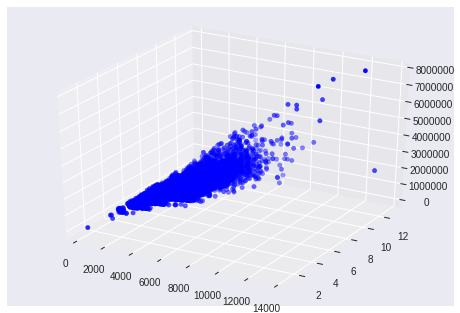

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(df['sqft_living'], df['grade'], df['price'],c='blue')

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz,alpha=0.5)
plt.title("House Price by Sq Ft Living Space & Sq Ft Above")
plt.ylabel("Grade")
plt.xlabel("Sq Ft Living Space")
ax.set_zlabel("Price")

plt.show()

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [53]:
# Using all variables
X3 = df.drop(columns=['price', 'id', 'date'])
y3 = df['price']

# Setup train/test splits
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=.5, random_state=42)

# See shapes of test/train
print(X3.shape, "\n", 10*'-')
print(X3_train.shape)
print(X3_test.shape)
print(y3_train.shape)
print(y3_test.shape)

X3_train.head()

(21613, 18) 
 ----------
(10806, 18)
(10807, 18)
(10806,)
(10807,)


bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
493           5       2.50         2820     14062     2.0           0     0   
4253          4       3.25         2880     35315     1.0           0     0   
18621         5       3.50         2450      8193     2.0           0     0   
1463          2       1.00          970      4284     1.0           0     0   
12026         3       1.75         2090      8910     1.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
493            4      7        2380            440      1960             0   
4253           3     11        2270            610      1982             0   
18621          3      9        2450              0      2005             0   
1463           3      7         970              0      1905             0   
12026          3      8        1230            860      1975             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  
493      98034  47.7081 -122.215           1910       10392  
4253     98005  47.6587 -122.163           1910      167378  
18621    98028  47.7721 -122.241           2310        8193  
1463     98103  47.6667 -122.333           2050        4284  
12026    98034  47.7149 -122.222           2310       10695

In [54]:
# Set and fit the model
model3 = LinearRegression()
model3.fit(X3_train, y3_train)

print("Coefficient: \n", model3.coef_)
print("\n Intercept: ", model3.intercept_)

Coefficient: 
 [-3.41930712e+04  3.97125261e+04  9.91229817e+01  1.04057427e-01
  1.00431682e+04  5.73273418e+05  5.36941305e+04  2.47210264e+04
  9.94432289e+04  6.02382105e+01  3.88847715e+01 -2.48044346e+03
  2.12570728e+01 -5.43588580e+02  5.91178244e+05 -1.85711473e+05
  2.64961862e+01 -3.65903971e-01]

 Intercept:  6705339.545452279


In [55]:
# Calculate RMSE, MSE and R-Squared
y3_test_predict = model3.predict(X3_test)

MSE3 = mean_squared_error(y3_test, y3_test_predict)

RMSE3 = (np.sqrt(mean_squared_error(y3_test, y3_test_predict)))

print('MSE is {}'.format(MSE3))
print('RMSE is {}'.format(RMSE3))

R2_all = r2_score(y3_test, y3_test_predict)

print('R^2 is {}'.format(R2_all))

MSE is 46526645704.63182
RMSE is 215700.36092837632
R^2 is 0.6876404957050217


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
